In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model 

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

170508288/170498071 [==============================] - 14s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [3]:
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [8]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), activation = "relu", padding = "same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(64, (3, 3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(128, (3, 3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)

model = Model(i, x)

In [5]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 25s 8ms/step - loss: 1.2811 - accuracy: 0.5551 - val_loss: 1.0409 - val_accuracy: 0.6421
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8438 - accuracy: 0.7050 - val_loss: 0.8664 - val_accuracy: 0.7112
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6929 - accuracy: 0.7615 - val_loss: 0.9771 - val_accuracy: 0.6679
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5836 - accuracy: 0.8013 - val_loss: 0.6742 - val_accuracy: 0.7744
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4873 - accuracy: 0.8303 - val_loss: 0.8483 - val_accuracy: 0.7387
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4152 - accuracy: 0.8562 - val_loss: 0.5898 - val_accuracy: 0.8090
Epoch 7/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.3619 - accuracy: 0.8740 - val_loss: 0.6006 - val_ac

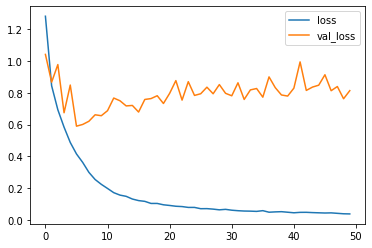

In [6]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

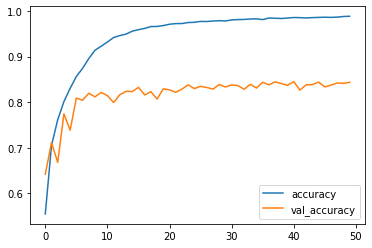

In [7]:
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.show()

In [9]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range = 0.1, width_shift_range = 0.1, horizontal_flip = True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
s = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data = (x_test, y_test), steps_per_epoch = s, epochs = 50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


1562/1562 [==============================] - 29s 18ms/step - loss: 1.4265 - accuracy: 0.5021 - val_loss: 1.0858 - val_accuracy: 0.6165
Epoch 2/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.9772 - accuracy: 0.6600 - val_loss: 0.8704 - val_accuracy: 0.7056
Epoch 3/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.8312 - accuracy: 0.7164 - val_loss: 0.7906 - val_accuracy: 0.7296
Epoch 4/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.7354 - accuracy: 0.7495 - val_loss: 0.6555 - val_accuracy: 0.7788
Epoch 5/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.6755 - accuracy: 0.7695 - val_loss: 0.6625 - val_accuracy: 0.7734
Epoch 6/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.6261 - accuracy: 0.7875 - val_loss: 0.5906 - val_accuracy: 0.8027
Epoch 7/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5772 - accuracy: 0.8044 - val_loss: 0.6192 - val_accura

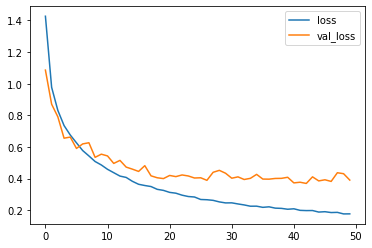

In [10]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

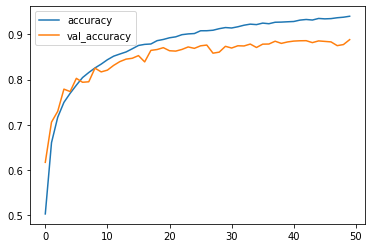

In [11]:
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.show()

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0   